In [55]:
import pandas as pd

In [56]:
df = pd.read_csv("state_data.csv")
print(df.shape) # 4 columns and 52 rows
print(f"Head: {df.head()}")
print(f"Tail: {df.tail()}")
# The columns repersent the state, its latitude and longitude, its abbreviated name and its full name
# The first state is Alaska, and the last is Wyoming, list ordered alphebetically by abbreviated name
# list produces 52 total states, this includes the Puerto Rico and DC.

(52, 4)
Head:   state   latitude   longitude        name
0    AK  63.588753 -154.493062      Alaska
1    AL  32.318231  -86.902298     Alabama
2    AR  35.201050  -91.831833    Arkansas
3    AZ  34.048928 -111.093731     Arizona
4    CA  36.778261 -119.417932  California
Tail:    state   latitude   longitude           name
47    VT  44.558803  -72.577841        Vermont
48    WA  47.751074 -120.740139     Washington
49    WI  43.784440  -88.787868      Wisconsin
50    WV  38.597626  -80.454903  West Virginia
51    WY  43.075968 -107.290284        Wyoming


In [57]:
print(f"Median lat: {df["latitude"].median()}")
print(f"Median log: {df["longitude"].median()}")

Median lat: 39.4355155
Median log: -89.093198


In [58]:
df["dist_to_median_lat"] = (df["latitude"] - df["latitude"].median()).abs()
print(df["dist_to_median_lat"])
df["dist_to_median_log"] = (df["longitude"] - df["longitude"].median()).abs()

print(df["dist_to_median_log"])

0     24.153237
1      7.117285
2      4.234465
3      5.386588
4      2.657255
5      0.114536
6      2.167705
7      0.529530
8      0.524684
9     11.770689
10     7.278081
11    19.536834
12     2.442487
13     4.632686
14     1.197609
15     1.115702
16     0.423614
17     1.596182
18     8.190693
19     2.971695
20     0.389761
21     5.818267
22     4.879328
23     7.294038
24     1.471263
25     7.080848
26     7.444167
27     3.675942
28     8.115977
29     2.057021
30     3.758336
31     0.622808
32     4.462786
33     0.632905
34     3.863912
35     0.981772
36     4.427763
37     4.368617
38     1.767806
39    21.214683
40     2.144579
41     5.599435
42     4.534000
43     3.918025
44     7.466916
45     0.114536
46     2.003943
47     5.123287
48     8.315559
49     4.348924
50     0.837890
51     3.640453
Name: dist_to_median_lat, dtype: float64
0     65.399864
1      2.190900
2      2.738635
3     22.000533
4     30.324734
5     16.688869
6     16.005449
7     12.059780

In [59]:
print(df.shape) # 52 rows and 6 columns

(52, 6)


In [60]:
print(f"Closest state to median latitude: {df.loc[df["dist_to_median_lat"] == df["dist_to_median_lat"].min()]["name"]} with distance {df["dist_to_median_lat"].min():.2f}")
print(f"Farthest state to median latitude: {df.loc[df["dist_to_median_lat"] == df["dist_to_median_lat"].max()]["name"]} with distance {df["dist_to_median_lat"].max():.2f}")

print(f"Closest state to median longitude: {df.loc[df["dist_to_median_log"] == df["dist_to_median_log"].min()]["name"]} with distance {df["dist_to_median_log"].min():.2f}")
print(f"Farthest state to median longitude: {df.loc[df["dist_to_median_log"] == df["dist_to_median_log"].max()]["name"]} with distance {df["dist_to_median_log"].max():.2f}")


Closest state to median latitude: 5     Colorado
45        Utah
Name: name, dtype: object with distance 0.11
Farthest state to median latitude: 0    Alaska
Name: name, dtype: object with distance 24.15
Closest state to median longitude: 14       Illinois
25    Mississippi
49      Wisconsin
Name: name, dtype: object with distance 0.31
Farthest state to median longitude: 11    Hawaii
Name: name, dtype: object with distance 66.57


In [61]:
df.style.set_sticky(axis="columns")
# documentation for style.set_sticky() can be found under "Other fun and useful stuff". It is is meant to be used for larger dataframes, allowing you to display the columns and row names of the entire frame.  The arguments of the function are which axis you would like to remain "sticky", which axis you would like to be able to see while scrolling through data. An exmaple of the input can be "index","rows" or "columns".


,state,latitude,longitude,name,dist_to_median_lat,dist_to_median_log
0,AK,63.588753,-154.493062,Alaska,24.153237,65.399864
1,AL,32.318231,-86.902298,Alabama,7.117285,2.190900
2,AR,35.201050,-91.831833,Arkansas,4.234465,2.738635
3,AZ,34.048928,-111.093731,Arizona,5.386588,22.000533
4,CA,36.778261,-119.417932,California,2.657255,30.324734
5,CO,39.550051,-105.782067,Colorado,0.114536,16.688869
6,CT,41.603221,-73.087749,Connecticut,2.167705,16.005449
7,DC,38.905985,-77.033418,District of Columbia,0.529530,12.059780
8,DE,38.910832,-75.527670,Delaware,0.524684,13.565528
9,FL,27.664827,-81.515754,Florida,11.770689,7.577444


In [149]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [150]:
data = pd.DataFrame(sns.load_dataset("planets"))
data = data.dropna()
print(data.shape) # 498 rows, 6 columns
print(f"Head: {data.head(5)}")
print(f"Tail: {data.tail(5)}")
data.style.set_sticky(axis="columns")
# The columns are method, number, orbital period, mass, distance and year. Method describes what type/ how the exoplanet was found, the number is number of planets in the system, orbital period is time it takes for the exoplanet to compelte one orbit around its star, mass is the mass of the exoplanet (often in Jupiters), distance is the estimated distance from the star to earth and the year is the year the planet was discovered.


(498, 6)
Head:             method  number  orbital_period   mass  distance  year
0  Radial Velocity       1         269.300   7.10     77.40  2006
1  Radial Velocity       1         874.774   2.21     56.95  2008
2  Radial Velocity       1         763.000   2.60     19.84  2011
3  Radial Velocity       1         326.030  19.40    110.62  2007
4  Radial Velocity       1         516.220  10.50    119.47  2009
Tail:               method  number  orbital_period   mass  distance  year
640  Radial Velocity       1       111.70000  2.100     14.90  2009
641  Radial Velocity       1         5.05050  1.068     44.46  2013
642  Radial Velocity       1       311.28800  1.940     17.24  1999
649          Transit       1         2.70339  1.470    178.00  2013
784  Radial Velocity       3       580.00000  0.947    135.00  2012


,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.100000,77.400000,2006
1,Radial Velocity,1,874.774000,2.210000,56.950000,2008
2,Radial Velocity,1,763.000000,2.600000,19.840000,2011
3,Radial Velocity,1,326.030000,19.400000,110.620000,2007
4,Radial Velocity,1,516.220000,10.500000,119.470000,2009
5,Radial Velocity,1,185.840000,4.800000,76.390000,2008
6,Radial Velocity,1,1773.400000,4.640000,18.150000,2002
8,Radial Velocity,1,993.300000,10.300000,73.100000,2008
9,Radial Velocity,2,452.800000,1.990000,74.790000,2010
10,Radial Velocity,2,883.000000,0.860000,74.790000,2010


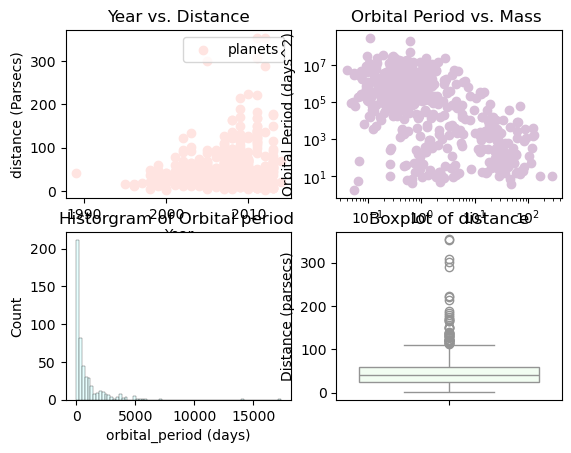

In [164]:
fig, axes= plt.subplots(2,2)

axes[0,0].scatter(data["year"], data["distance"], label = "planets", color = "mistyrose")
axes[0,0].set_title("Year vs. Distance")
axes[0,0].set_xlabel("Year")
axes[0,0].set_ylabel("distance (Parsecs)")
axes[0,0].legend(loc = 'upper right')

axes[0,1].set_xlabel("Mass (1/Jupiters))")
axes[0,1].set_xscale('log')
axes[0,1].set_yscale('log')
axes[0,1].scatter(1/data["mass"],data["orbital_period"]**2, color = "thistle")
axes[0,1].set_ylabel("Orbital Period (days^2)")
axes[0,1].set_title("Orbital Period vs. Mass ")

sns.histplot(data["orbital_period"], ax = axes[1,0], color = "lightcyan")
axes[1,0].set_xlabel("orbital_period (days)")
axes[1,0].set_title("Historgram of Orbital period ")

sns.boxplot(data["distance"], ax = axes[1,1], color = "honeydew",)
axes[1,1].set_ylabel("Distance (parsecs)")
axes[1,1].set_title("Boxplot of distance")

plt.show()
# axes [0,0] displays year discovered versus distance from earth, where we could predict that dues to increased familiarity and longevity of use, that we would see more exoplanets discovered more recently. The data revelas an almost exponential increase in planets discovered from 1990 to 2010, where we can draw the conclusion that the tools being used are improving as previous data would be warranted valid to create an increase in findings later on. As there is not clear discontinuity, this suggests steady developments/ dsicoveries are made without major error or breakthorugh.
# axes [0,1] displays the 1/mass versus Period^2 Kepler's period equation states T = 2pisqrt(a^3/GM), where we can linearize the relationship by rewriting the equation as T^2 = (1/M) (2pi*a^3)/G, where T^2 =y, x = 1/M and the slope = (2pi*a^3)/G. This linearization can also be expressed using the log scale on the x and y axis, depicting an roughly linear increase, where as mass increases, period decreases, consistent with our theory
# axes [1,0] displays a histogram of the orbital period and the number of planets exhibiting this behvarior. We can find use these findings to identify the most common behavior in the set, adn find the data is heavily skewed left, to where many/ most planets have an orbital period of less than 5000 days, and many less than ~ 2500 days. We can use this data to make inferences about planet size and behavior (using the previous equation) and to classify the findings by what category they fall into.
# axes [1,1] displays a box plot of the distance data, where the distance is on the y axis. Usinga boxplot, we can view the data extremas, quartiles 1-4 and upper and lower quartile markings, the median of the set. We can infer from oberving the plot that the median of the data is around ~ 50 parsecs, with seemingly higher extremas/farther away. As this is related to the number of planets found at a distance, we could infer that the current measuring methods ( primarily radial velocity) are suitible for detecting distance at this range.
